In [1]:
import h5py
import numpy as np

In [3]:
# from storage import download_batches
# download_batches("final_batches")
# download_batches("final_results")

INFO:Storage:Downloading final_batches/batch_00000.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00000.hdf5
INFO:Storage:Downloading final_batches/batch_00001.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00001.hdf5
INFO:Storage:Downloading final_batches/batch_00002.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00002.hdf5
INFO:Storage:Downloading final_batches/batch_00003.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00003.hdf5
INFO:Storage:Downloading final_batches/batch_00004.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00004.hdf5
INFO:Storage:Downloading final_batches/batch_00005.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00005.hdf5
INFO:Storage:Downloading final_batches/batch_00006.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00006.hdf5
INFO:Storage:Downloading final_batches/batch_00007.hdf5
INFO:Storage:Finshed downloading final_batches/batch_00007.hdf5
INFO:Storage:Downloading final_batches/b

In [2]:
storage_batches_cleaned = []
areas_cleaned = []
total_heating_cleaned = []
total_cooling_cleaned = []
window_u_cleaned = []
facade_hcp_cleaned = []
roof_hcp_cleaned = []
monthly_cleaned = []
hourly_cleaned = []

for i in range(591):
  print(f"Cleaning file {i}")
  with h5py.File(f"./data/hdf5/final_batches/batch_{i:05d}.hdf5", "r") as f:
      storage_batch = f["storage_vectors"][...] # this loads the whole batch into memory!
  with h5py.File(f"./data/hdf5/final_results/batch_{i:05d}_results.hdf5", 'r') as f:
      monthly = f["monthly"][...] # this loads the whole batch into memory!
      total_heating = f["total_heating"][...] # this loads the whole batch into memory!
      total_cooling = f["total_cooling"][...] # this loads the whole batch into memory!
      errors = f["errors"][...]
      area = f["area"][...]
      window_u = f["true_u"][...]
      facade_hcp = f["true_facade_hcp"][...]
      roof_hcp = f["true_roof_hcp"][...]
      hourly = f["hourly"][...]
  mask = errors != 1
  

  storage_batch = storage_batch[mask]
  total_heating = total_heating[mask]
  total_cooling = total_cooling[mask]
  area = area[mask]
  window_u = window_u[mask]
  facade_hcp = facade_hcp[mask]
  roof_hcp = roof_hcp[mask]
  monthly = monthly[mask]
  hourly = hourly[mask]

  storage_batches_cleaned.append(storage_batch)
  areas_cleaned.append(area)
  total_heating_cleaned.append(total_heating)
  total_cooling_cleaned.append(total_cooling)
  window_u_cleaned.append(window_u)
  facade_hcp_cleaned.append(facade_hcp)
  roof_hcp_cleaned.append(roof_hcp)
  monthly_cleaned.append(monthly)
  hourly_cleaned.append(hourly)

area = np.concatenate(areas_cleaned)
total_heating = np.concatenate(total_heating_cleaned)
total_cooling = np.concatenate(total_cooling_cleaned)
window_u = np.concatenate(window_u_cleaned)
facade_hcp = np.concatenate(facade_hcp_cleaned)
roof_hcp = np.concatenate(roof_hcp_cleaned)
storage_batch = np.vstack(storage_batches_cleaned)
monthly = np.vstack(monthly_cleaned)
hourly = np.vstack(hourly_cleaned)
with h5py.File("./data/all_data.hdf5", "w") as f:
  for name,data in [
      ("area", area), 
      ("total_heating", total_heating), 
      ("total_cooling", total_cooling), 
      ("window_u", window_u),
      ("facade_hcp", facade_hcp),
      ("roof_hcp", roof_hcp),
      ("storage_batch", storage_batch),
      ("monthly", monthly),
      ("hourly", hourly)
  ]:
    f.create_dataset(
      name,
      shape=data.shape,
      data=data,
      compression="gzip",
      compression_opts=6,
    )

Cleaning file 0
Cleaning file 1
Cleaning file 2
Cleaning file 3
Cleaning file 4
Cleaning file 5
Cleaning file 6
Cleaning file 7
Cleaning file 8
Cleaning file 9
Cleaning file 10
Cleaning file 11
Cleaning file 12
Cleaning file 13
Cleaning file 14
Cleaning file 15
Cleaning file 16
Cleaning file 17
Cleaning file 18
Cleaning file 19
Cleaning file 20
Cleaning file 21
Cleaning file 22
Cleaning file 23
Cleaning file 24
Cleaning file 25
Cleaning file 26
Cleaning file 27
Cleaning file 28
Cleaning file 29
Cleaning file 30
Cleaning file 31
Cleaning file 32
Cleaning file 33
Cleaning file 34
Cleaning file 35
Cleaning file 36
Cleaning file 37
Cleaning file 38
Cleaning file 39
Cleaning file 40
Cleaning file 41
Cleaning file 42
Cleaning file 43
Cleaning file 44
Cleaning file 45
Cleaning file 46
Cleaning file 47
Cleaning file 48
Cleaning file 49
Cleaning file 50
Cleaning file 51
Cleaning file 52
Cleaning file 53
Cleaning file 54
Cleaning file 55
Cleaning file 56
Cleaning file 57
Cleaning file 58
Cleanin

KeyboardInterrupt: 

In [ ]:
from storage import upload_to_bucket

In [ ]:
upload_to_bucket("all_data_monthly.hdf5","./data/all_data.hdf5")

INFO:Storage:Uploading ./data/all_data.hdf5 to bucket:all_data_monthly.hdf5...
INFO:Storage:Done uploading.


In [ ]:
print(np.min(total_cooling))

6.6897535e-13


In [ ]:
import matplotlib.pyplot as plt


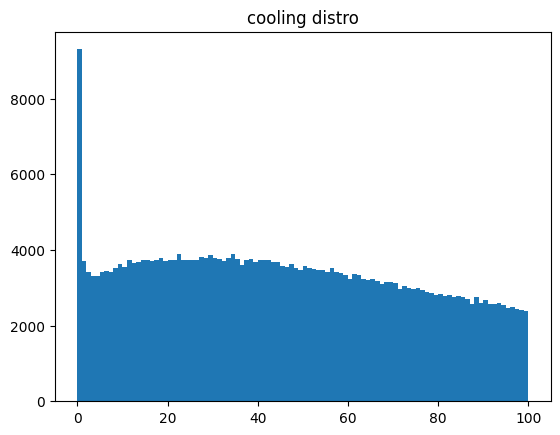

In [ ]:
plt.figure()
plt.hist((total_cooling / area)[total_cooling / area < 100], bins=100)
txt = plt.title("cooling distro")

In [ ]:
vec

In [ ]:
low_cooling_bldgs = storage_batch[np.argwhere(total_cooling / area < 1).flatten()]
low_cooling_bldgs_cool = (total_cooling/area)[total_cooling/area < 1]

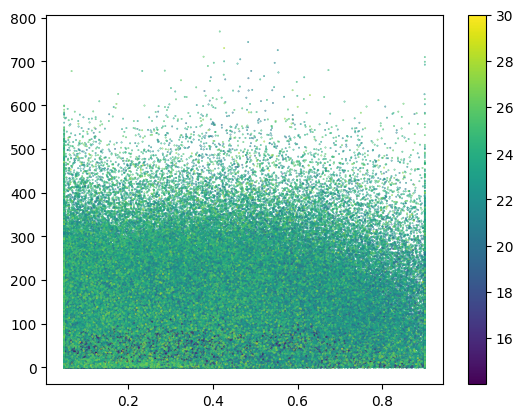

In [ ]:
a = plt.scatter(storage_batch[:,12], total_heating/area,s=0.1, c=storage_batch[:,15])
plt.colorbar()

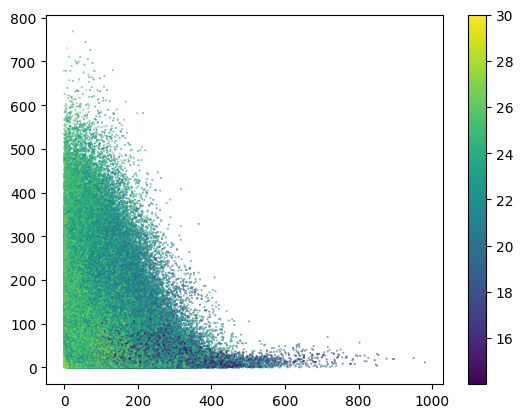

In [ ]:
a = plt.scatter(total_cooling/area, total_heating/area,s=0.1, c=storage_batch[:,15])
plt.colorbar()